# Personalised Mecidine - Exploratory Data Analysis

## Goal of project
Automatically classify genetic mutations that contribute to cancer tumor growth drivers) vs. presence of mutations that don’t affect the tumors (passengers)

## Importing data

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [28]:
var_path = "Data/training_variants"
text_path = "Data/training_text"

d_train = pd.read_csv(var_path)
d_text = pd.read_csv(text_path, sep = "\|\|", skiprows=1, names = ['ID','Text'], engine="python")

## Variants file

### Variable Understanding

In [29]:
d_train.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
dtype: object

- ID - A specific gene of the specimen
- Gene - The specific gene where the mutation took place
- Variation - the nature of the mutation
- Class - Class which we must predict
    - between 1 and 9

In [30]:
d_train.apply(pd.Series.nunique)

ID           3321
Gene          264
Variation    2996
Class           9
dtype: int64

We now know that there are 3321 records in our training set - all of which are unique.
Although we have 264 unique genes and 2996 unique variations.
Lastly there are 9 classes.

In [31]:
d_train.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

We know that there are no null values in the dataset.

### Univariant Analysis

### Class

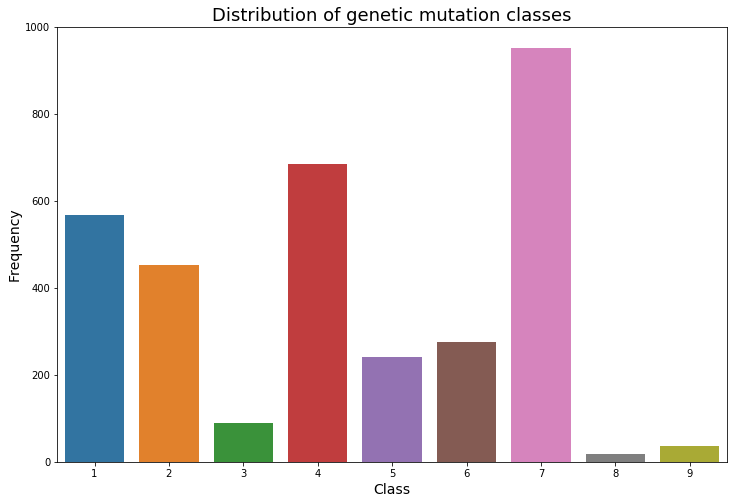

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

- Class 7 is very common, followed by 1, 2, and 4
- Class 3, 8, 9 are not very common

### Gene

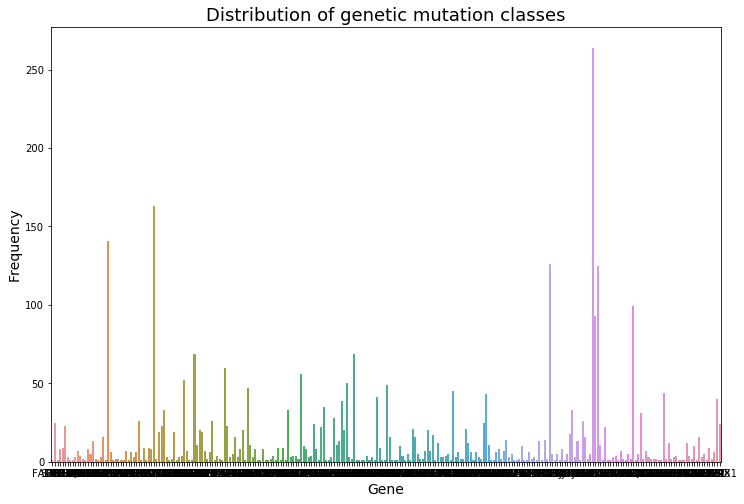

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gene", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

In [34]:
# Find top 10 genes
gene_freq = d_train['Gene'].value_counts()
print("Top-10 Gene Occurances\n")
print(gene_freq.head(10))

Top-10 Gene Occurances

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64


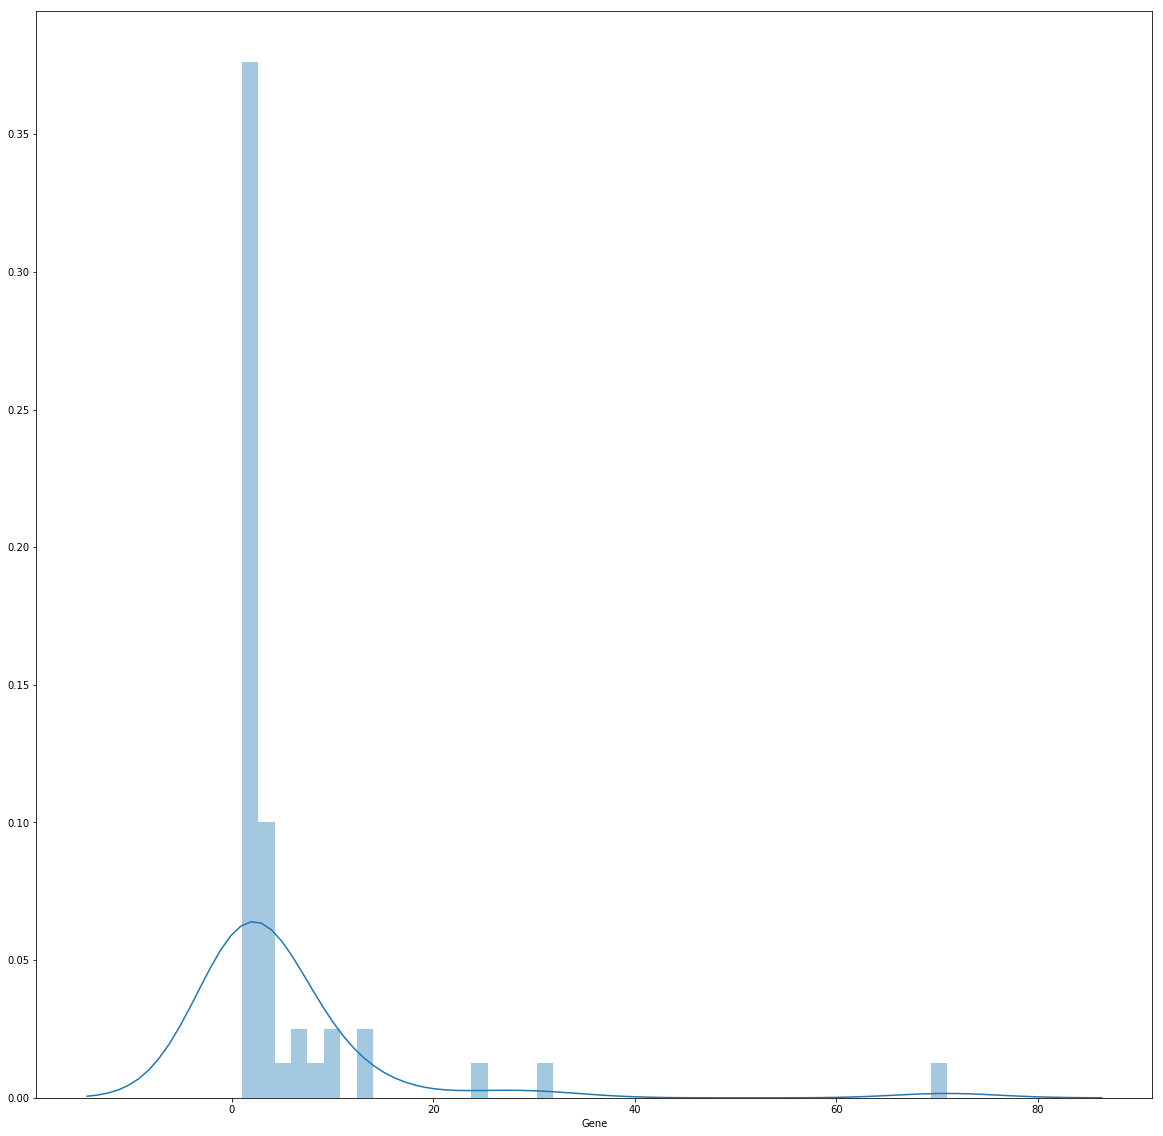

In [36]:
#Look at distribution of frequency of genes
plt.figure(figsize=(20,20))
sns.distplot(gene_freq.value_counts())

- There are a lot of genes that appear only once, and quite a few appear twice

In [156]:
#Get frequency and standard deviation for genes occuring more than once
filter_genes = gene_freq[gene_freq > 2]
print(stats.kurtosis(filter_genes),stats.skew(filter_genes))

24.253454297558463 4.360256036389982


### Variation

In [38]:
print("Description of Variation")
print(d_train['Variation'].describe())
print("\nTop Five Variations")
print(d_train['Variation'].value_counts().head(5))

Description of Variation
count                     3321
unique                    2996
top       Truncating Mutations
freq                        93
Name: Variation, dtype: object

Top Five Variations
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
Name: Variation, dtype: int64


- There are a lot of unique variation
- Only the top foud variations appear somewhat often
- Variation may not provide much information

## Bivariant Analysis

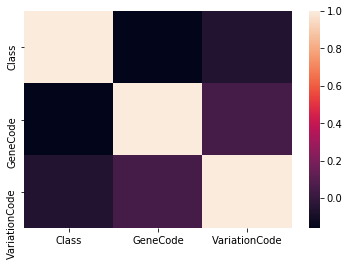

In [39]:
# Converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes
d_train['GeneCode'] = d_train['Gene'].cat.codes
d_train['VariationCode'] = d_train['Variation'].cat.codes
d_train.head()

# Calculate correlations
corr = d_train[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr)
plt.show()

- There does not appear to be much correlation anywhere

### Gene and Variation

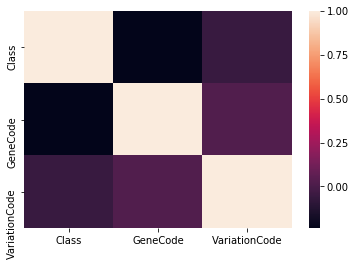

In [40]:
#Correlation using top 20 genes
top_20_genes = d_train[(d_train['Gene'].isin(gene_freq.head(20).index))]

# Calculate correlations
corr = top_20_genes[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr)
plt.show()

- Slightly better, but still does not appear to have much correlation

### Top 20 Gene Distribution by Class

In [41]:
#top_20_genes.head()
#g = sns.factorplot("Gene", hue="Gene", col="Class", data=top_20_genes, kind="count")

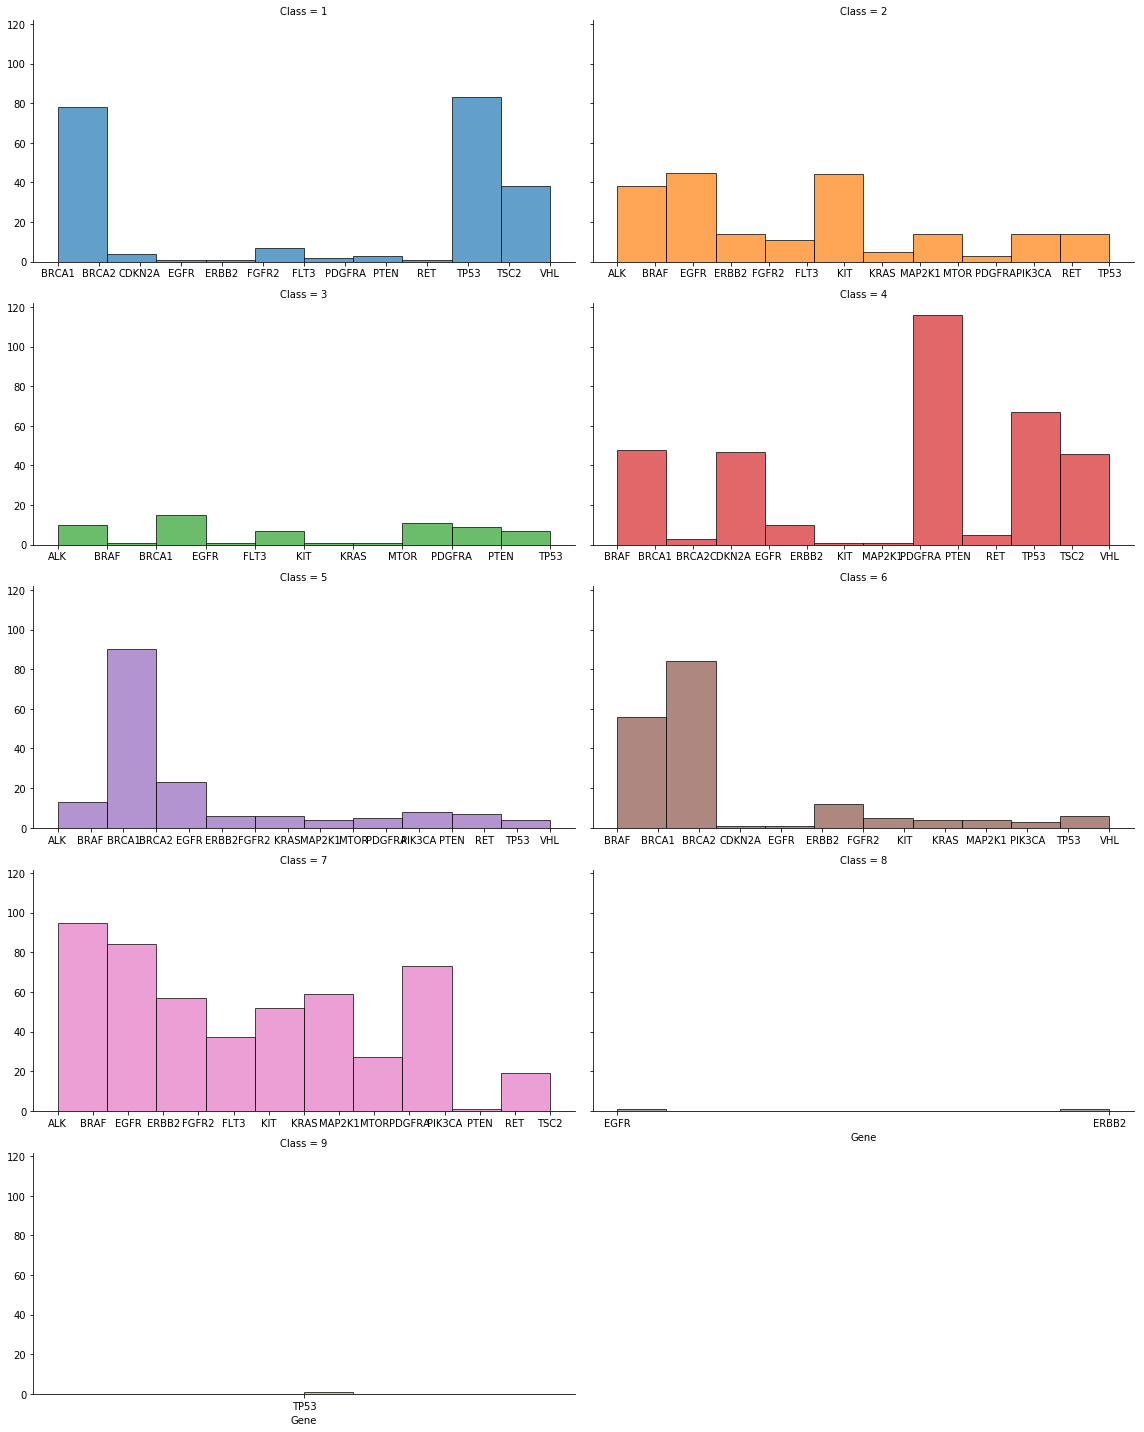

In [87]:
g = sns.FacetGrid(top_20_genes, col="Class", col_wrap=2, size=4, aspect=2, hue="Class", margin_titles=True, sharex=False)
g.map(plt.hist, "Gene", alpha=0.7, edgecolor='#000000');
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
plt.tight_layout()

## Text File (Natural Language Processing)

### Categorize by Class

In [149]:
merged_data = pd.merge(d_train,d_text,on='ID')
merged_data['Class'].value_counts()


7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [150]:
#Get class1 text
class1_text = merged_data[merged_data['Class'] == 1]['Text']
class1_text = pd.DataFrame(class1_text)
class1_text = class1_text.reset_index(drop=True)
class1_text

,Text
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL is a negative regulator of activated recep...
2,To determine if residual cylindrical refractiv...
3,Sex cord–stromal tumors and germ-cell tumors a...
4,Sex cord–stromal tumors and germ-cell tumors a...
5,Mesenchymal cell populations contribute to mic...
6,Mesenchymal cell populations contribute to mic...
7,The receptor protein tyrosine phosphatase T (P...
8,The receptor protein tyrosine phosphatase T (P...
9,Receptor protein tyrosine phosphatase T (PTPRT...


## Timeline

- Data Exploration: January 22, 2018 - February 5, 2018 (Weeks 3-5)
- Data Preparation: February 5, 2018 - March 2, 2018 (Weeks 5-8)
- Modeling: March 2, 2018 - March 20, 2018 (Weeks 8-10)
- Documentation and Poster: March 20, 2018 - April 6, 2018 (Weeks 10-12)